In [ ]:
# The purpose of this project is to increase ecommerce sales of Jiffy.com, a blank apparel company. We will use the RFM model (recency, frequency, and monetary data) to unlock personalized marketing, and maximize cohort analysis to increase retention.

In [233]:
# Importing libararies
from datetime import datetime
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [208]:
# Read orders file
orders=pd.read_csv('/Users/weiyuli/Desktop/data/orders.csv')
orders.head(3)

,order_id,customer_uid,order_timestamp,discount,ship_state,shipping_revenue,shipping_cost,returned
0,38831,a6730d49e0989b2cc0158c6182fafb93,2015-11-30 05:03:15.159,0.0,FL,0.00,6.8,False
1,45499,ae2e8c1fa5326e1f793d4c02f720156c,2015-11-30 19:52:10.830,0.0,TN,5.95,6.8,True
2,69415,ba200839cd304b8342f8c5d0eb4d7c75,2015-12-02 22:54:40.380,0.0,TN,0.00,6.8,False


In [209]:
# Read line items file
items=pd.read_csv('/Users/weiyuli/Desktop/data/line_items.csv')
items.head(3)

,line_item_id,order_id,quantity,selling_price,supplier_cost,product_category,color,size
0,1073625002,31323782,1,9.25,4.37,OTHER,BLACK,2XL
1,8055020046,22921936,1,9.25,4.37,OTHER,BLACK,2XL
2,5008546658,4435273,1,9.25,4.37,OTHER,BLACK,2XL


In [210]:
# Add new renenue column to items table
items['revenue']=items['selling_price']*items['quantity']
items.head(3)

,line_item_id,order_id,quantity,selling_price,supplier_cost,product_category,color,size,revenue
0,1073625002,31323782,1,9.25,4.37,OTHER,BLACK,2XL,9.25
1,8055020046,22921936,1,9.25,4.37,OTHER,BLACK,2XL,9.25
2,5008546658,4435273,1,9.25,4.37,OTHER,BLACK,2XL,9.25


In [211]:
# Create date column based on order_timestamp
orders['date'] = pd.to_datetime(orders['order_timestamp'])
orders.head(3)

,order_id,customer_uid,order_timestamp,discount,ship_state,shipping_revenue,shipping_cost,returned,date
0,38831,a6730d49e0989b2cc0158c6182fafb93,2015-11-30 05:03:15.159,0.0,FL,0.00,6.8,False,2015-11-30 05:03:15.159
1,45499,ae2e8c1fa5326e1f793d4c02f720156c,2015-11-30 19:52:10.830,0.0,TN,5.95,6.8,True,2015-11-30 19:52:10.830
2,69415,ba200839cd304b8342f8c5d0eb4d7c75,2015-12-02 22:54:40.380,0.0,TN,0.00,6.8,False,2015-12-02 22:54:40.380


In [212]:
# Join items and orders tables using order_id
df=items.merge(orders, how='left', on='order_id')
df.head(20)

,line_item_id,order_id,quantity,selling_price,supplier_cost,product_category,color,size,revenue,customer_uid,order_timestamp,discount,ship_state,shipping_revenue,shipping_cost,returned,date
0,1073625002,31323782,1,9.25,4.37,OTHER,BLACK,2XL,9.25,2674197df180fdb59dfdaa65757e1f4c,2020-05-22 20:00:58.985,0.075,MI,9.95,8.52,False,2020-05-22 20:00:58.985
1,8055020046,22921936,1,9.25,4.37,OTHER,BLACK,2XL,9.25,1bcd890fd3b1c598cfd6ea4b3e3b34f1,2019-10-10 18:22:52.295,0.040,PA,0.00,12.27,True,2019-10-10 18:22:52.295
2,5008546658,4435273,1,9.25,4.37,OTHER,BLACK,2XL,9.25,3069349651afb03593af7d090535f5dc,2017-05-08 21:42:06.888,0.040,AL,0.00,7.09,False,2017-05-08 21:42:06.888
3,1013699827,6843815,1,9.25,4.37,OTHER,BLACK,2XL,9.25,64f9abc25d599e49cfddeb3de7774ca0,2017-10-23 02:03:00.536,0.000,MI,0.00,7.09,False,2017-10-23 02:03:00.536
4,1022146551,9923010,1,9.25,4.37,OTHER,RED,2XL,9.25,d47a0e4a0c6d4e95ade399421c28b5f6,2018-05-22 22:44:35.824,0.000,LA,0.00,7.39,False,2018-05-22 22:44:35.824
5,5001304676,897011,1,9.25,4.37,OTHER,RED,2XL,9.25,3069349651afb03593af7d090535f5dc,2016-04-04 21:52:30.574,0.000,AL,0.00,6.80,False,2016-04-04 21:52:30.574
6,5001302446,949897,1,9.25,4.37,OTHER,RED,2XL,9.25,3069349651afb03593af7d090535f5dc,2016-04-04 21:24:08.161,0.125,AL,0.00,0.00,False,2016-04-04 21:24:08.161
7,5001304677,897011,1,13.50,7.11,OTHER,RED,3XL,13.50,3069349651afb03593af7d090535f5dc,2016-04-04 21:52:30.574,0.000,AL,0.00,6.80,False,2016-04-04 21:52:30.574
8,1002241505,1446247,3,9.31,4.17,OTHER,BLACK,2XL,27.93,466c637ec98030cfc71c8b85f297c476,2016-06-10 13:22:51.571,0.040,IN,0.00,7.09,False,2016-06-10 13:22:51.571
9,9001563508,1083237,2,4.82,3.27,Fashion Tee,BLACK,OTHER,9.64,4a14eb828138502cfb45574454a8e197,2016-04-24 14:25:39.811,0.000,FL,7.95,6.80,False,2016-04-24 14:25:39.811


In [213]:
# Check for duplicates values
print('Duplicate entries: {}'.format(df.duplicated().sum()))
print('{}% rows are duplicate.'.format(round((df.duplicated().sum()/df.shape[0])*100),2))
# Remove duplicate data
df.drop_duplicates(inplace = True)

Duplicate entries: 30
0% rows are duplicate.


In [214]:
df.describe()

,line_item_id,order_id,quantity,selling_price,supplier_cost,revenue,discount,shipping_revenue,shipping_cost,date
count,3.738480e+05,3.738480e+05,373848.000000,373826.000000,373828.000000,373826.000000,373848.000000,373848.000000,373848.000000,373848
mean,1.192973e+10,2.700794e+07,2.337899,6.431785,3.592298,12.956464,0.043858,1.499758,8.324141,2019-04-29 03:53:59.826288896
min,1.000026e+09,8.170000e+02,1.000000,0.960000,0.000000,0.960000,0.000000,0.000000,0.000000,2015-11-25 19:36:48.114000
25%,3.066496e+09,1.047751e+07,1.000000,3.250000,1.930000,4.660000,0.000000,0.000000,7.390000,2018-06-26 22:11:16.680999936
50%,8.020797e+09,2.062844e+07,1.000000,5.050000,2.940000,7.650000,0.040000,0.000000,7.990000,2019-07-20 15:23:34.851000064
75%,1.706437e+10,3.095542e+07,2.000000,7.820000,4.290000,13.520000,0.075000,0.000000,8.670000,2020-05-28 23:30:38.456000
max,1.181034e+11,9.639224e+07,725.000000,169.000000,71.630000,5333.200000,0.198000,10.000000,19.950000,2021-01-01 01:00:11.137000
std,1.720761e+10,2.276066e+07,4.588576,5.435405,2.475649,24.584702,0.053519,3.164443,1.862517,NaN


<Axes: >

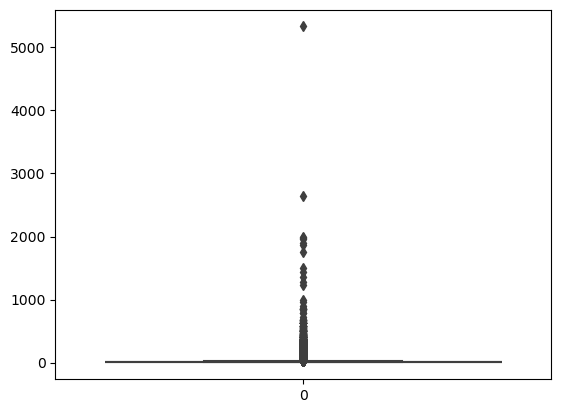

In [215]:
# Use Box Plot to see outliers clearly
import seaborn as sns
sns.boxplot(df['revenue'])


In [216]:
# find the limits 
upper_limit = df['revenue'].mean() + 3*df['revenue'].std()
lower_limit = df['revenue'].mean() - 3*df['revenue'].std()
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)

upper limit: 86.71056973916072
lower limit: -60.79764212042901


In [217]:
# find the outliers
df.loc[(df['revenue'] >upper_limit) | (df['revenue'] < lower_limit)]

,line_item_id,order_id,quantity,selling_price,supplier_cost,product_category,color,size,revenue,customer_uid,order_timestamp,discount,ship_state,shipping_revenue,shipping_cost,returned,date
188,40071339406,30086719,14,6.66,4.22,Fashion Tee,BLACK,2XL,93.24,5945fa89273681f4790b9c934540e898,2020-05-05 19:24:41.896,0.175,OK,0.00,8.52,False,2020-05-05 19:24:41.896
439,2014314331,7095614,15,6.66,4.22,Fashion Tee,BLACK,2XL,99.90,2470fd512d77116140729e72c7b92f8d,2017-11-28 18:18:32.200,0.143,CO,0.00,7.09,False,2017-11-28 18:18:32.200
675,9029508632,12680351,22,7.38,4.61,Fashion Tee,HEATHER,L,162.36,810fd152f49ff611a1ed992d33ea9439,2018-10-10 20:56:09.867,0.143,TX,0.00,7.39,False,2018-10-10 20:56:09.867
874,18063202474,26883629,10,9.22,5.25,Fashion Tee,BLACK,L,92.20,f8ab9e95db687f98db42417a05502fd6,2020-02-05 15:00:17.549,0.175,MT,0.00,8.27,False,2020-02-05 15:00:17.549
1096,19088004767,56132487,25,7.38,4.33,Fashion Tee,COLOR,2XL,184.50,31ba08a1ef9a82bf51cfc6ea754f5cf1,2020-09-01 19:09:20.045,0.075,TX,0.00,9.55,False,2020-09-01 19:09:20.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373605,44096871688,79211209,20,9.08,4.84,OTHER,COLOR,L,181.60,deee69b669523640be4dbb6e0f8d559b,2020-11-03 00:05:55.524,0.143,MS,0.00,11.00,False,2020-11-03 00:05:55.524
373652,48086508710,55000415,8,12.78,6.78,OTHER,WHITE,L,102.24,c6f2737be7387397baa7aeec1bf203ec,2020-08-21 17:16:26.562,0.143,GA,0.00,11.00,True,2020-08-21 17:16:26.562
373736,49091108864,63949756,20,11.29,6.30,OTHER,COLOR,M,225.80,a1560770694f54e81144777a37470531,2020-09-24 02:26:23.945,0.143,ND,0.00,10.52,False,2020-09-24 02:26:23.945
373742,47101766989,90208233,10,18.28,8.25,Sweater,COLOR,M,182.80,f4ee72a7a6d6426ebcaf883d9fb91c0a,2020-12-08 01:12:01.228,0.143,FL,1.93,13.00,False,2020-12-08 01:12:01.228


In [218]:
# trimming - delete the outlier data
new_df=df.loc[(df['revenue'] < upper_limit) & (df['revenue'] > lower_limit)]
print('before removing outliers:', len(df))
print('new data:',len(new_df))
print('outliers:',len(df)-len(new_df))

before removing outliers: 373848
new data: 369828
outliers: 4020


<Axes: >

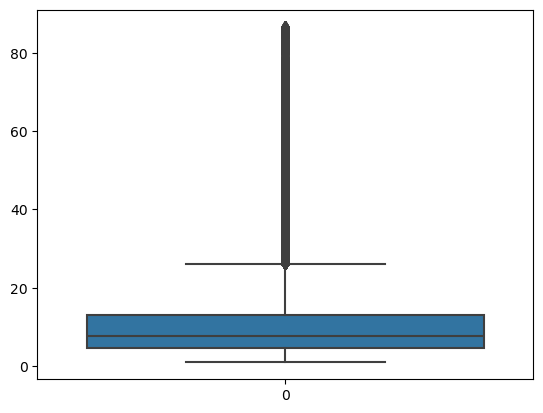

In [219]:
sns.boxplot(new_df['revenue'])

In [220]:
# capping - change the outlier values eto upper (or) lower limit values
new_df = df.copy()
new_df.loc[(new_df['revenue']>upper_limit), 'revenue'] = upper_limit
new_df.loc[(new_df['revenue']<lower_limit), 'revenue'] = lower_limit

In [222]:
len(new_df)

373848

In [223]:
new_df.describe()

,line_item_id,order_id,quantity,selling_price,supplier_cost,revenue,discount,shipping_revenue,shipping_cost,date
count,3.738480e+05,3.738480e+05,373848.000000,373826.000000,373828.000000,373826.000000,373848.000000,373848.000000,373848.000000,373848
mean,1.192973e+10,2.700794e+07,2.337899,6.431785,3.592298,12.185929,0.043858,1.499758,8.324141,2019-04-29 03:53:59.826288896
min,1.000026e+09,8.170000e+02,1.000000,0.960000,0.000000,0.960000,0.000000,0.000000,0.000000,2015-11-25 19:36:48.114000
25%,3.066496e+09,1.047751e+07,1.000000,3.250000,1.930000,4.660000,0.000000,0.000000,7.390000,2018-06-26 22:11:16.680999936
50%,8.020797e+09,2.062844e+07,1.000000,5.050000,2.940000,7.650000,0.040000,0.000000,7.990000,2019-07-20 15:23:34.851000064
75%,1.706437e+10,3.095542e+07,2.000000,7.820000,4.290000,13.520000,0.075000,0.000000,8.670000,2020-05-28 23:30:38.456000
max,1.181034e+11,9.639224e+07,725.000000,169.000000,71.630000,86.710570,0.198000,10.000000,19.950000,2021-01-01 01:00:11.137000
std,1.720761e+10,2.276066e+07,4.588576,5.435405,2.475649,13.757932,0.053519,3.164443,1.862517,NaN


In [224]:
# Create RFM modelling scores for each customer
# Calculate recency
df_recency = new_df.groupby(by='customer_uid', 
						as_index=False)['date'].max()
df_recency.columns = ['customer_uid', 'last_purchase_date']
recent_date = df_recency['last_purchase_date'].max()
df_recency['Recency'] = df_recency['last_purchase_date'].apply(
	lambda x: (recent_date - x).days)
df_recency.head(3)


,customer_uid,last_purchase_date,Recency
0,00074f521fd7e7b8862d6de975bf7da0,2020-04-13 18:34:00.618,262
1,00084927a1414e820a82782c9956c44a,2017-09-19 06:07:09.260,1199
2,0009df61ea36f0588581a45cba32343f,2018-07-16 16:22:35.518,899


In [225]:
# Calculate frequency
frequency_df = new_df.drop_duplicates().groupby(
        by=['customer_uid'], as_index=False)['date'].count()
frequency_df.columns = ['customer_uid','Frequency']
frequency_df.head(3)

,customer_uid,Frequency
0,00074f521fd7e7b8862d6de975bf7da0,1
1,00084927a1414e820a82782c9956c44a,16
2,0009df61ea36f0588581a45cba32343f,3


In [226]:
#Calculate monetary value
monetary_df = new_df.groupby(by='customer_uid', as_index=False)['revenue'].sum()
monetary_df.columns = ['customer_uid','Monetary']
monetary_df.head(3)

,customer_uid,Monetary
0,00074f521fd7e7b8862d6de975bf7da0,86.71057
1,00084927a1414e820a82782c9956c44a,76.12000
2,0009df61ea36f0588581a45cba32343f,24.88000


In [227]:
# Merging all three columns in one dataframe
rf_df = df_recency.merge(frequency_df, on='customer_uid')
rfm_df = rf_df.merge(monetary_df, on='customer_uid').drop(columns='last_purchase_date')
rfm_df.head(3)

,customer_uid,Recency,Frequency,Monetary
0,00074f521fd7e7b8862d6de975bf7da0,262,1,86.71057
1,00084927a1414e820a82782c9956c44a,1199,16,76.12000
2,0009df61ea36f0588581a45cba32343f,899,3,24.88000


In [228]:
# Ranking Customer’s based upon their recency, frequency, and monetary score
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head(7)


,customer_uid,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,00074f521fd7e7b8862d6de975bf7da0,262,1,86.71057,59.050831,4.741634,4.741634
1,00084927a1414e820a82782c9956c44a,1199,16,76.12000,11.586484,66.371054,66.371054
2,0009df61ea36f0588581a45cba32343f,899,3,24.88000,21.942127,20.562847,20.562847
3,001632349a7d0ca4aaef9d7ce70ed05b,1178,6,103.90000,12.308421,39.547121,39.547121
4,001eb9af0c90990bde1a83d485946c25,588,4,22.14000,36.883839,27.663474,27.663474
5,002224cfcae0532fa94a1f5d071b43b3,528,9,77.41000,40.771643,51.619960,51.619960
6,0023271ac9655586c4f4744c81ab9920,857,6,15.98000,23.445174,39.547121,39.547121


In [238]:
# Calculating RFM SCORE
# RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. 
# Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
	rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_uid', 'RFM_Score']].head(7)


,customer_uid,RFM_Score
0,00074f521fd7e7b8862d6de975bf7da0,0.64
1,00084927a1414e820a82782c9956c44a,2.91
2,0009df61ea36f0588581a45cba32343f,1.04
3,001632349a7d0ca4aaef9d7ce70ed05b,1.77
4,001eb9af0c90990bde1a83d485946c25,1.45
5,002224cfcae0532fa94a1f5d071b43b3,2.50
6,0023271ac9655586c4f4744c81ab9920,1.86


In [247]:
rfm_df.head(50)


,customer_uid,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,00074f521fd7e7b8862d6de975bf7da0,262,1,86.71,59.05,4.74,4.74,0.64,Lost Customers
1,00084927a1414e820a82782c9956c44a,1199,16,76.12,11.59,66.37,66.37,2.91,Low Value Customers
2,0009df61ea36f0588581a45cba32343f,899,3,24.88,21.94,20.56,20.56,1.04,Lost Customers
3,001632349a7d0ca4aaef9d7ce70ed05b,1178,6,103.90,12.31,39.55,39.55,1.77,Low Value Customers
4,001eb9af0c90990bde1a83d485946c25,588,4,22.14,36.88,27.66,27.66,1.45,Lost Customers
5,002224cfcae0532fa94a1f5d071b43b3,528,9,77.41,40.77,51.62,51.62,2.50,Low Value Customers
6,0023271ac9655586c4f4744c81ab9920,857,6,15.98,23.45,39.55,39.55,1.86,Low Value Customers
7,0025516109bb58324c695618944102f5,676,30,281.10,31.33,78.96,78.96,3.59,Medium Value Customer
8,0027ab9cda48b94b3e29936393409321,653,14,57.37,32.33,63.11,63.11,2.92,Low Value Customers
9,002f8816ca0a21db5b577fff5bd3b645,40,10,139.56,89.28,54.53,54.53,2.99,Low Value Customers


In [239]:
# Rating customer based upon the RFM score
# rfm score >4.5 : Top Customer
# 4.5 > rfm score > 4 : High Value Customer
# 4>rfm score >3 : Medium value customer
# 3>rfm score>1.6 : Low-value customer
# rfm score<1.6 :Lost Customer
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
									4.5, "Top Customers", 
									(np.where(
										rfm_df['RFM_Score'] > 4,
										"High Value Customer",
										(np.where(
	rfm_df['RFM_Score'] > 3,
							"Medium Value Customer",
							np.where(rfm_df['RFM_Score'] > 1.6, 
							'Low Value Customers', 'Lost Customers'))))))
rfm_df[['customer_uid', 'RFM_Score', 'Customer_segment']].head(20)




,customer_uid,RFM_Score,Customer_segment
0,00074f521fd7e7b8862d6de975bf7da0,0.64,Lost Customers
1,00084927a1414e820a82782c9956c44a,2.91,Low Value Customers
2,0009df61ea36f0588581a45cba32343f,1.04,Lost Customers
3,001632349a7d0ca4aaef9d7ce70ed05b,1.77,Low Value Customers
4,001eb9af0c90990bde1a83d485946c25,1.45,Lost Customers
5,002224cfcae0532fa94a1f5d071b43b3,2.50,Low Value Customers
6,0023271ac9655586c4f4744c81ab9920,1.86,Low Value Customers
7,0025516109bb58324c695618944102f5,3.59,Medium Value Customer
8,0027ab9cda48b94b3e29936393409321,2.92,Low Value Customers
9,002f8816ca0a21db5b577fff5bd3b645,2.99,Low Value Customers


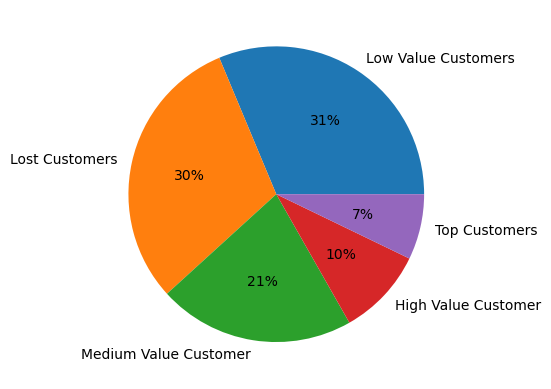

In [240]:
# Visualizing the customer segments
plt.pie(rfm_df.Customer_segment.value_counts(),
		labels=rfm_df.Customer_segment.value_counts().index,
		autopct='%.0f%%')
plt.show()
